In [ ]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import math
from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

###Step 1: Understanding Our Data

First we need to load in our dataset using the read_csv function in pandas

In [ ]:
 credit_data = pd.read_csv("credit-data.csv")

Next, we will want to inspect our data and understand which fields are included. Looking at this data, what should our target variable be? Any ideas?

In [ ]:
credit_data.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0


Now, we'll want to see if there are any N/As in the dataset

In [ ]:
credit_data.isna().any()

PersonID                                False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
zipcode                                 False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool

In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41016 entries, 0 to 41015
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   PersonID                              41016 non-null  int64  
 1   SeriousDlqin2yrs                      41016 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  41016 non-null  float64
 3   age                                   41016 non-null  int64  
 4   zipcode                               41016 non-null  int64  
 5   NumberOfTime30-59DaysPastDueNotWorse  41016 non-null  int64  
 6   DebtRatio                             41016 non-null  float64
 7   MonthlyIncome                         33042 non-null  float64
 8   NumberOfOpenCreditLinesAndLoans       41016 non-null  int64  
 9   NumberOfTimes90DaysLate               41016 non-null  int64  
 10  NumberRealEstateLoansOrLines          41016 non-null  int64  
 11  NumberOfTime60-

Below, we will inspect our dataset to see what kinds of values are provided for each column.

In [ ]:
credit_data.describe()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.000000,41016.000000,41016.00000,41016.000000,41016.000000,41016.000000,41016.000000,3.304200e+04,41016.000000,41016.000000,41016.000000,41016.000000,39979.000000
mean,115800.154598,0.161400,6.37587,51.683489,60623.824166,0.589233,331.458137,6.578996e+03,8.403477,0.419592,1.008801,0.371587,0.773231
std,28112.723511,0.367904,221.61895,14.746880,11.984357,5.205628,1296.109695,1.344683e+04,5.207324,5.190382,1.153826,5.169641,1.121269
min,22.000000,0.000000,0.00000,21.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106539.750000,0.000000,0.03431,41.000000,60618.000000,0.000000,0.176375,3.333000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,119901.500000,0.000000,0.18973,51.000000,60625.000000,0.000000,0.369736,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,134698.250000,0.000000,0.66716,62.000000,60629.000000,0.000000,0.866471,8.055750e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149999.000000,1.000000,22000.00000,109.000000,60644.000000,98.000000,106885.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


It might be visually easier for us to see the values using a histogram

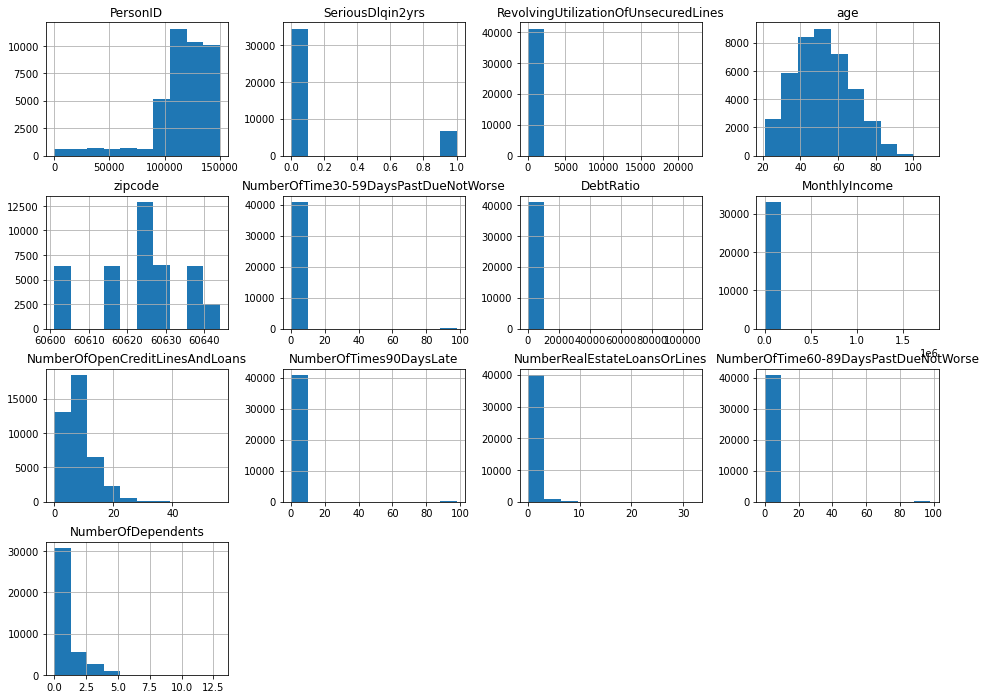

In [ ]:
plt.rcParams['figure.figsize'] = 16, 12
credit_data.hist()
plt.show()

Do any of the values look strange? What should we do to fix them?

In [ ]:
credit_data[credit_data['DebtRatio'] > 100]

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,1.000000,55,60601,0,505.0,0.0,2,0,0,0,0.0
13,99145,0,0.549207,61,60601,0,2107.0,NaN,8,0,2,0,1.0
14,99147,0,0.183321,39,60601,0,775.0,NaN,4,0,0,0,0.0
32,99302,0,0.007206,67,60601,0,11279.0,NaN,10,0,4,0,0.0
33,99311,0,0.046264,35,60601,1,518.0,NaN,8,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40987,123523,0,0.633829,41,60644,0,4724.0,NaN,19,0,2,1,2.0
40994,123597,0,0.082361,58,60644,0,1581.0,NaN,8,0,1,0,0.0
40996,123628,0,0.097561,64,60644,0,2369.0,NaN,5,0,1,0,0.0
41002,123658,0,0.199712,60,60644,1,5384.0,NaN,13,0,6,0,0.0


In [ ]:
credit_data[credit_data['MonthlyIncome'].isna()]

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
13,99145,0,0.549207,61,60601,0,2107.0,NaN,8,0,2,0,1.0
14,99147,0,0.183321,39,60601,0,775.0,NaN,4,0,0,0,0.0
27,99267,0,0.018174,63,60601,0,45.0,NaN,4,0,0,0,0.0
31,99300,0,0.000000,72,60601,0,69.0,NaN,6,0,0,0,0.0
32,99302,0,0.007206,67,60601,0,11279.0,NaN,10,0,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40994,123597,0,0.082361,58,60644,0,1581.0,NaN,8,0,1,0,0.0
40996,123628,0,0.097561,64,60644,0,2369.0,NaN,5,0,1,0,0.0
41002,123658,0,0.199712,60,60644,1,5384.0,NaN,13,0,6,0,0.0
41013,123730,0,0.007576,74,60644,0,14.0,NaN,9,0,0,0,0.0


Now that we see that the culprit might be these N/A monthly incomes, we can decide to just remove those rows from our dataset

In [ ]:
credit_data = credit_data[credit_data['MonthlyIncome'].notna()]

In [ ]:
credit_data[credit_data['DebtRatio'] > 100]

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,1.000000,55,60601,0,505.0,0.0,2,0,0,0,0.0
158,100632,0,0.027335,57,60601,0,2307.0,0.0,16,0,1,0,0.0
252,101658,0,0.001212,62,60601,0,1116.0,0.0,13,0,1,0,0.0
267,101807,0,0.031762,28,60601,1,262.5,1.0,12,0,0,0,2.0
565,104799,0,0.047247,37,60601,0,316.0,0.0,5,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40290,116589,0,0.000000,53,60644,0,2755.0,0.0,16,0,2,0,3.0
40387,117531,0,1.000000,28,60644,1,441.0,0.0,1,2,0,0,0.0
40799,121519,0,0.231481,42,60644,0,1567.5,1.0,9,0,1,0,3.0
40941,123031,0,0.098515,49,60644,0,875.0,1.0,5,0,2,0,0.0


Now, we want to see what the relationships between different variables are. This is an important step for us to understand which variables might be very correlated with each other. If the variables seem extremely correlated, we may choose to drop one of the variables from the model to ensure we still have good predictive power.

In [ ]:
correlations = credit_data.corr()
correlations

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
PersonID,1.000000,-0.621510,0.005033,0.095437,-0.018943,-0.077557,0.006001,0.019755,0.019412,-0.068668,-0.000631,-0.055153,-0.030378
SeriousDlqin2yrs,-0.621510,1.000000,-0.006503,-0.152462,-0.047816,0.144919,-0.004334,-0.032810,-0.034495,0.129647,-0.004545,0.108975,0.065389
RevolvingUtilizationOfUnsecuredLines,0.005033,-0.006503,1.000000,-0.008925,0.006136,-0.001630,-0.001146,0.005832,-0.014338,-0.001594,0.002381,-0.001200,0.010279
age,0.095437,-0.152462,-0.008925,1.000000,0.004672,-0.054464,0.003723,0.048138,0.196067,-0.055686,0.078648,-0.049221,-0.204317
zipcode,-0.018943,-0.047816,0.006136,0.004672,1.000000,0.000886,0.001138,-0.004980,-0.010092,0.002381,0.002991,0.002660,-0.003696
NumberOfTime30-59DaysPastDueNotWorse,-0.077557,0.144919,-0.001630,-0.054464,0.000886,1.000000,-0.001386,-0.015224,-0.054963,0.975480,-0.028853,0.981599,0.002203
DebtRatio,0.006001,-0.004334,-0.001146,0.003723,0.001138,-0.001386,1.000000,-0.022988,0.014790,-0.002675,0.015829,-0.001696,-0.001443
MonthlyIncome,0.019755,-0.032810,0.005832,0.048138,-0.004980,-0.015224,-0.022988,1.000000,0.107100,-0.017954,0.127313,-0.015336,0.060528
NumberOfOpenCreditLinesAndLoans,0.019412,-0.034495,-0.014338,0.196067,-0.010092,-0.054963,0.014790,0.107100,1.000000,-0.087372,0.437245,-0.073760,0.030790
NumberOfTimes90DaysLate,-0.068668,0.129647,-0.001594,-0.055686,0.002381,0.975480,-0.002675,-0.017954,-0.087372,1.000000,-0.048272,0.987877,-0.005589


It's a bit hard to see in table format, so we are going to go ahead and look at a correlation matrix

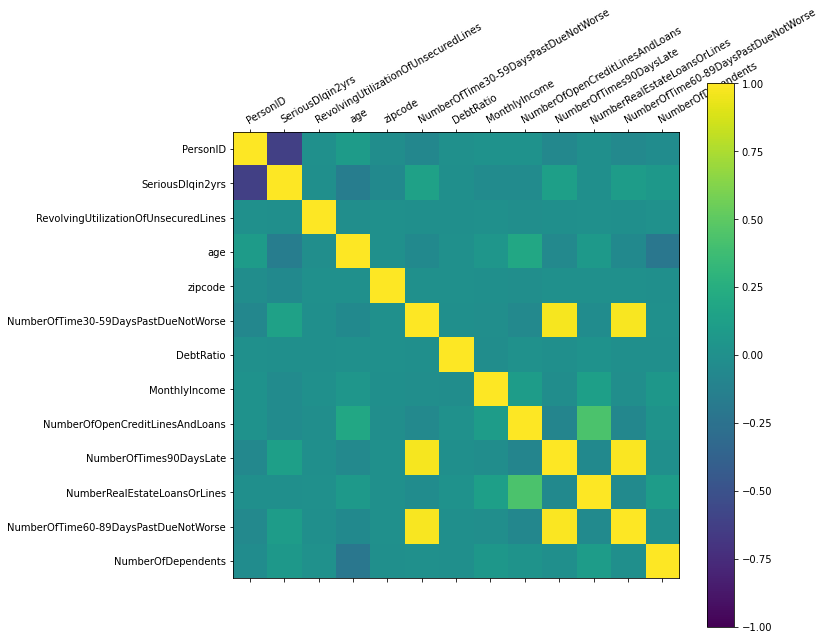

In [ ]:
	plt.rcParams['figure.figsize'] = 10, 10
	names = correlations.columns
	fig = plt.figure()
	ax = fig.add_subplot(111)
	cax = ax.matshow(correlations, vmin=-1, vmax=1)
	fig.colorbar(cax)
	ticks = np.arange(0,len(names),1)
	ax.set_xticks(ticks)
	ax.set_yticks(ticks)
	ax.set_xticklabels(names, rotation=30, rotation_mode='anchor', ha='left')
	ax.set_yticklabels(names)
	plt.show()

As we can see, the "NumberOfTime" variables are highly correlated with each other.

Now,we might want to understand the relative outliers still present in our data.

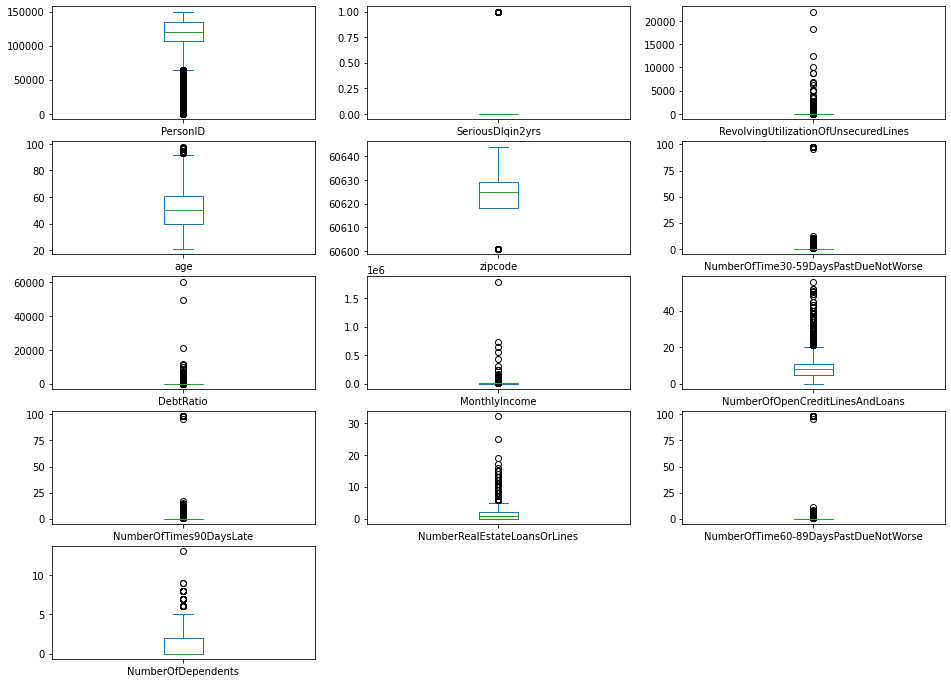

In [ ]:
	plt.rcParams['figure.figsize'] = 16, 12
	credit_data.plot(kind='box', subplots=True,
	layout=(5, math.ceil(len(credit_data.columns)/5)),
	sharex=False, sharey=False)
	plt.show()

Now that we understand our data, we want to take some additional steps to pre-process our data before putting it into the model. First, we will deal with the remaining N/A values.

In [ ]:
processed_df = credit_data.copy(deep=True)
processed_df = processed_df.fillna(processed_df.median())

In [ ]:
processed_df.isna().any()

PersonID                                False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
zipcode                                 False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                           False
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                      False
dtype: bool

If we look at our dataset again now, we can see what the distribution of the dataset is after we did the preprocessing step.

In [ ]:
processed_df.describe()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,33042.000000,33042.000000,33042.000000,33042.000000,33042.000000,33042.000000,33042.000000,3.304200e+04,33042.000000,33042.000000,33042.000000,33042.000000,33042.000000
mean,115555.777011,0.167302,5.707450,50.726984,60623.801102,0.514769,24.284182,6.578996e+03,8.702863,0.325495,1.047727,0.279674,0.869772
std,28327.738047,0.373251,217.932762,14.385729,11.986702,4.241411,509.870268,1.344683e+04,5.224104,4.214614,1.174672,4.188372,1.153126
min,22.000000,0.000000,0.000000,21.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106322.250000,0.000000,0.040661,40.000000,60618.000000,0.000000,0.145356,3.333000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,119792.500000,0.000000,0.217279,50.000000,60625.000000,0.000000,0.298643,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,134640.750000,0.000000,0.679959,61.000000,60629.000000,0.000000,0.492640,8.055750e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,149999.000000,1.000000,22000.000000,98.000000,60644.000000,98.000000,60212.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


We might also want to know what variable types each of the variables in the dataset, and convert them if need be.

In [ ]:
processed_df.dtypes

PersonID                                  int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

Looking at the above, we see that the ID variable is an integer, but that is likely confusing so we will convert that to a string. We can also convert some of the floats to ints to make things more uniform.

In [ ]:
processed_df['PersonID'] = processed_df['PersonID'].astype(str)
processed_df['RevolvingUtilizationOfUnsecuredLines'] = processed_df['RevolvingUtilizationOfUnsecuredLines'].astype(int)
processed_df['MonthlyIncome'] = processed_df['MonthlyIncome'].astype(int)
processed_df['NumberOfDependents'] = processed_df['NumberOfDependents'].astype(int)

In [ ]:
processed_df.dtypes

PersonID                                 object
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines      int64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                             int64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                        int64
dtype: object

In [ ]:
processed_df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,0,55,60601,0,505.000000,0,2,0,0,0,0
1,98991,0,0,71,60601,0,0.459565,15666,7,0,2,0,0
2,99012,0,0,51,60601,0,0.014520,4200,5,0,0,0,0
3,99023,0,0,55,60601,4,0.794875,9052,12,0,3,0,0
4,99027,0,0,45,60601,0,0.049966,10406,4,0,0,0,2


###Step 2: Putting together our model!

First, we need to decide which features to include in our model. Depending on which model we use, we may need to complete additional pre-processing steps. In today's class, we will be fitting a simple logistic regression model, which accepts continuous variables, so we do not need to do much extra work to pre-process the data.

Let's come back to the same question again: What is our x variable? What is our y variable?

In [ ]:
selected_features = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfDependents']
selected_y = 'SeriousDlqin2yrs'

In [ ]:
x = processed_df[selected_features]
y = processed_df[selected_y]

In [ ]:
x.shape

(33042, 8)

In [ ]:
y.shape

(33042,)

For the purposes of evaluating our model at a later date, we need to split our dataset into training data and testing data. We will use the sklearn function modules for this. In some cases, you may also want to split into 3 datasets (train, validation, and test). For simplicity, I won't do that now but we will cover this more when we discuss model evaluation next time.

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=1, shuffle=False)

Below, I check the size of the test data (the number of rows). This is relevant later on when we think about evaluation.

In [ ]:
y_test.shape

(6609,)

In [ ]:
X_train.shape

(26433, 8)

#### Time to train a logistic regression model!



In [ ]:
clf_log = LogisticRegression(C=0.1, max_iter=500)
clf_log = clf_log.fit(X_train, y_train)

In [ ]:
print(clf_log)

LogisticRegression(C=0.1, max_iter=500)


Now that our model is trained, we will want to apply our model to the test set (which the model has never seen before). Using the testing data, we will try to create a vector of predicted y values, for each of the x_test values.

In [ ]:
y_pred = clf_log.predict(X_test)

In [ ]:
y_pred.shape

(6609,)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y_test

32769    0
32770    0
32772    0
32773    0
32774    0
        ..
41009    0
41010    0
41011    0
41012    0
41015    0
Name: SeriousDlqin2yrs, Length: 6609, dtype: int64

Now we can use a built-in sklearn function to get our accuracy score for the model.

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.8657890755031018